# Selection at a locus with two alleles in a haploid population
Based off code for [genetic drift at a locus with two alleles](https://forwardsimulation.github.io/intro2simulation/md/singlelocus.html) by Kevin Thornton.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(8)

In [2]:
def simulator(reps, N, p, s, simlen):
    tracker = []
    for pop in range(reps):
        freqs = [p]
        for g in range(simlen - 1):
            if s < 0:
                ps = np.random.binomial(N*freqs[-1], 1 + s, 1)[0]/N
                pn = np.random.binomial(N, ps, 1)[0]/N
            elif s >= 0:
                ps = np.random.binomial(N*(1 - freqs[-1]), 1 - s, 1)[0]/N
                pn = np.random.binomial(N, (1 - ps), 1)[0]/N
            freqs.append(pn)
        if pop == 0:
            tracker = freqs
        else:
            tracker = np.vstack([tracker, freqs])
    return tracker

#### Positive selection test case

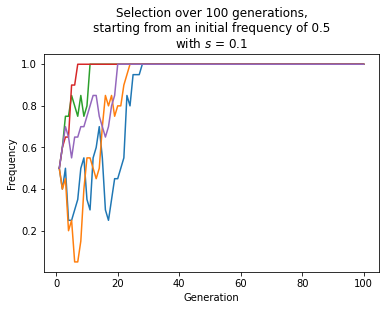

In [3]:
t = simulator(reps = 5, N = 20, p = 0.5, s = 0.1, simlen = 100)
f, ax = plt.subplots()
ax.set_xlabel("Generation")
ax.set_ylabel("Frequency")
ax.set_title("Selection over 100 generations,\nstarting from an initial frequency of 0.5\nwith $s$ = 0.1");
for j in range(5):
    ax.plot([i+1 for i in range(100)], t[j])

#### Negative selection test case

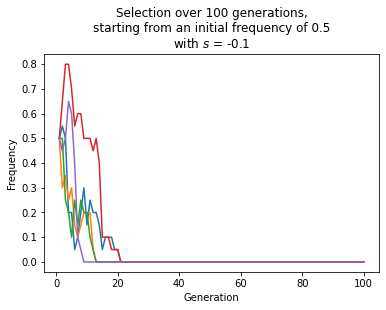

In [4]:
t = simulator(reps = 5, N = 20, p = 0.5, s = -0.1, simlen = 100)
f, ax = plt.subplots()
ax.set_xlabel("Generation")
ax.set_ylabel("Frequency")
ax.set_title("Selection over 100 generations,\nstarting from an initial frequency of 0.5\nwith $s$ = -0.1");
for j in range(5):
    ax.plot([i+1 for i in range(100)], t[j])

#### Fixation probability

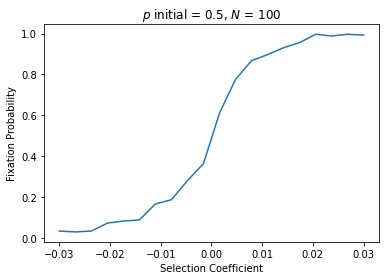

In [5]:
prob = []
for s in np.linspace(-0.03, 0.03, 20):
    t = simulator(reps = 100, N = 100, p = 0.5, s = s, simlen = 100)
    prob.append(t.mean(axis = 0)[99])
f, ax = plt.subplots()
ax.set_xlabel("Selection Coefficient")
ax.set_ylabel("Fixation Probability")
ax.set_title("$p$ initial = 0.5, $N$ = 100")
ax.plot(np.linspace(-0.03, 0.03, 20), prob);

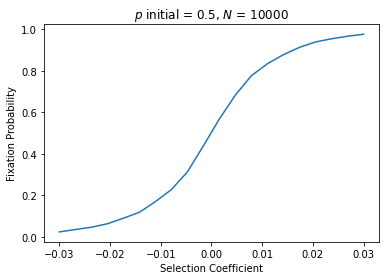

In [6]:
prob = []
for s in np.linspace(-0.03, 0.03, 20):
    t = simulator(reps = 100, N = 10000, p = 0.5, s = s, simlen = 100)
    prob.append(t.mean(axis = 0)[99])
f, ax = plt.subplots()
ax.set_xlabel("Selection Coefficient")
ax.set_ylabel("Fixation Probability")
ax.set_title("$p$ initial = 0.5, $N$ = 10000")
ax.plot(np.linspace(-0.03, 0.03, 20), prob);

#### Sojourn Time

In [7]:
def getFixTime(t, simlen):
    fix = []
    for i in range(100):
        x = np.where(t[i] == 1)
        if x[0].size < 1:
            x = np.where(t[i] == 0)
        if x[0].size < 1:
            x = (np.array([simlen]),)
        fix.append(x[0][0])
    return sum(fix)/len(fix)

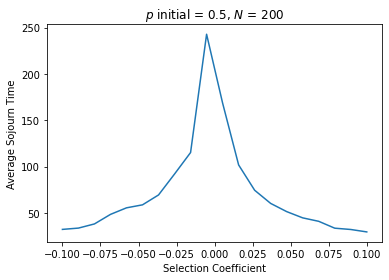

In [8]:
times = []
simlen = 500
for s in np.linspace(-0.1, 0.1, 20):
    t = simulator(reps = 100, N = 200, p = 0.5, s = s, simlen = simlen)
    fix = getFixTime(t, simlen)
    times.append(fix)
f, ax = plt.subplots()
ax.set_xlabel("Selection Coefficient")
ax.set_ylabel("Average Sojourn Time")
ax.set_title("$p$ initial = 0.5, $N$ = 200")
ax.plot(np.linspace(-0.1, 0.1, 20), times);

In [10]:
import os
os.system('jupyter nbconvert --to html GillespieCh2.ipynb');